In [1]:
from tifffile import imread, imwrite
import numpy as np
import os, sys
from tqdm import tqdm
import shutil
from matplotlib import pyplot as plt

In [2]:
ppath = '/stanley/WangLab/Data/Processed/2022-09-30-Rena-Cardiomyocyte64Gene'
fpath = os.path.join(ppath, 'output', '2022-12-05-2D-segmentation-unstitched-tiles/tiles_to_segment')
rpath = os.path.join(ppath, 'output', '2022-12-05-2D-segmentation-unstitched-tiles/2022-12-06-2D-projection')

In [3]:
tile_num = [112, 114, 123, 124, 136, 190, 202, 214, 226, 289, 290, 292, 303, 366, 378, 390, 454, 455, 478]

### a plug in
accidentally deleted some rotated images so redo that here

In [15]:
ppath = '/stanley/WangLab/Data/Processed/2022-09-30-Rena-Cardiomyocyte64Gene'
dapiPath = ppath + '/round1'
morphPath = ppath + '/output/2022-10-06-registration'

dapiOutPath = ppath +'/output/2022-10-07-rotation/rotated_seqDapi'
flamingoOutPath = ppath +'/output/2022-10-07-rotation/rotated_flamingo'
sarcomereOutPath = ppath +'/output/2022-10-07-rotation/rotated_sarcomere'

In [25]:
# seq images
for pos in tqdm(os.listdir(dapiPath)):
    if int(pos[-3:]) in tile_num:
        if os.path.isdir(os.path.join(dapiPath, pos)):
            for chs in os.listdir(os.path.join(dapiPath, pos)):
                if chs.endswith('ch04.tif'):
                    img = imread(os.path.join(dapiPath, pos, chs))
                    rot_img = np.rot90(img, k=1, axes=(2,1))
                    imwrite(os.path.join(dapiOutPath, pos+'.tif'), rot_img)

100%|█████████████████████████████████████████| 528/528 [01:11<00:00,  7.43it/s]


In [26]:
# morph images
for pos in tqdm(os.listdir(morphPath)):
    if int(pos[-3:]) in tile_num:
        for chs in os.listdir(os.path.join(morphPath, pos)):
            if chs == 'flamingo_reg.Tif':
                img = imread(os.path.join(morphPath, pos, chs))
                rot_img = np.rot90(img, k=1, axes=(2,1))
                imwrite(os.path.join(flamingoOutPath, pos+'.tif'), rot_img)
            if chs == 'sarcomere_reg.Tif':
                img = imread(os.path.join(morphPath, pos, chs))
                rot_img = np.rot90(img, k=1, axes=(2,1))
                imwrite(os.path.join(sarcomereOutPath, pos+'.tif'), rot_img)

100%|█████████████████████████████████████████| 528/528 [01:13<00:00,  7.23it/s]


## move selected tiles to separate folder

In [4]:
dapi_folder = os.path.join(fpath, 'dapi')
flamingo_folder = os.path.join(fpath, 'flamingo')

In [38]:
for f in os.listdir(dapiOutPath):
    if f.endswith('tif'):
        shutil.copy(os.path.join(dapiOutPath, f), dapi_folder)

In [39]:
for f in os.listdir(flamingoOutPath):
    if f.endswith('tif'):
        shutil.copy(os.path.join(flamingoOutPath, f), flamingo_folder)

## project to 2D

In [5]:
from skimage import exposure

In [6]:
for tile in os.listdir(dapi_folder):
    if tile.endswith('tif'):
        im = imread(os.path.join(dapi_folder, tile))
        im2d = np.max(im, axis=0)
        # imeq = exposure.equalize_hist(im2d)
        imwrite(os.path.join(rpath, 'dapi', f'dapi_{tile}'), im2d)
    # break

In [6]:
for tile in os.listdir(flamingo_folder):
    im = imread(os.path.join(flamingo_folder, tile))
    imsum = np.sum(im, axis=0)
    break
    # imeq = exposure.equalize_hist(im2d)
    imwrite(os.path.join(rpath, 'flamingo', f'flamingoSUM_{tile}'), imsum)

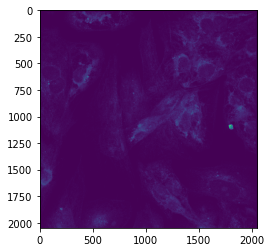

In [7]:
plt.imshow(imsum)

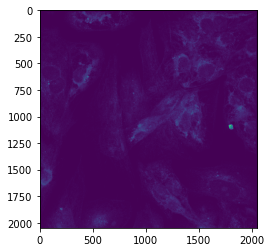

In [14]:
test = imsum / np.amax(imsum) * 254
plt.imshow(test)

In [12]:
imwrite(os.path.join(rpath, 'flamingo', 'test.tif'), test)

In [13]:
np.amax(test)

255.0